In [1]:
import seaborn as sns
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator

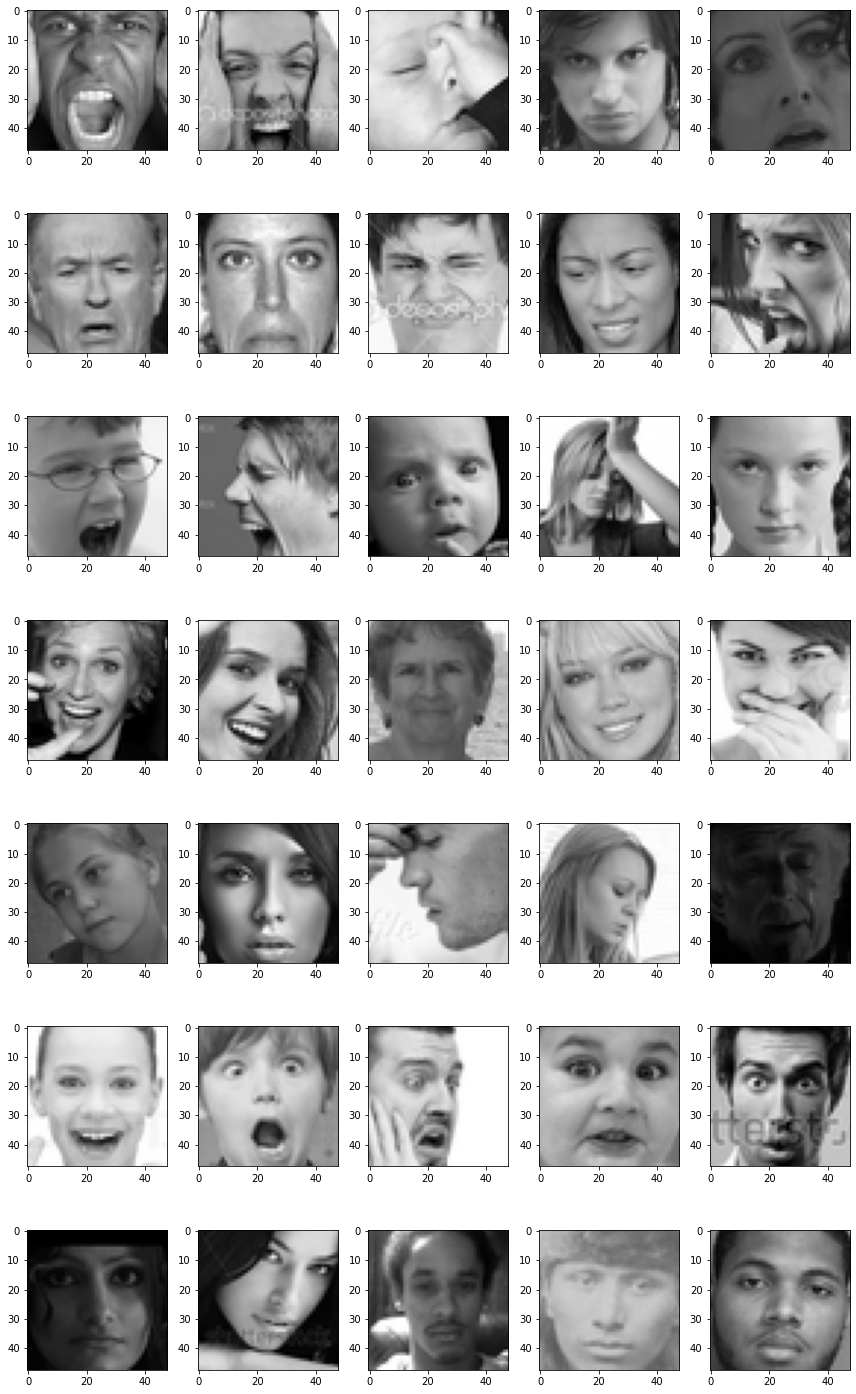

In [2]:
import numpy as np

from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "data - Copy/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "test"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "test/" + expression + "/" +os.listdir(base_path + "test/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [3]:
img = cv2.imread("data - Copy/test/1/32476.png")
print(img.shape)

(48, 48, 3)


In [4]:

batch_size = 128
base_path = "data - Copy/"


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "val",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [5]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 56, 56, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       5

In [8]:
%%time

# number of epochs to train the NN
epochs = 50

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("my_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
224/224 [==============================] - 36s 160ms/step - loss: 1.9381 - accuracy: 0.2401 - val_loss: 1.8350 - val_accuracy: 0.2243

Epoch 00001: val_accuracy improved from -inf to 0.22433, saving model to my_model.h5
Epoch 2/50
224/224 [==============================] - 35s 158ms/step - loss: 1.8757 - accuracy: 0.2553 - val_loss: 1.7839 - val_accuracy: 0.2645

Epoch 00002: val_accuracy improved from 0.22433 to 0.26451, saving model to my_model.h5
Epoch 3/50
224/224 [==============================] - 36s 158ms/step - loss: 1.8356 - accuracy: 0.2705 - val_loss: 1.6618 - val_accuracy: 0.3440

Epoch 00003: val_accuracy improved from 0.26451 to 0.34403, saving model to my_model.h5
Epoch 4/50
224/224 [==============================] - 35s 158ms/step - loss: 1.7830 - accuracy: 0.2942 - val_loss: 1.6949 - val_accuracy: 0.3443

Epoch 00004: val_accuracy improved from 0.34403 to 0.34431, saving model to my_model.h5
Epoch 5/50
224/224 [==============================] - 35s 158ms/ste

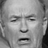

In [6]:
from keras.preprocessing import image
testing_image=image.load_img(r'data - Copy/test/1/32476.png',target_size=(48,48,3))
testing_image

In [7]:
testing_image=image.img_to_array(testing_image)

In [8]:
testing_image

array([[[ 75.,  75.,  75.],
        [ 66.,  66.,  66.],
        [ 63.,  63.,  63.],
        ...,
        [108., 108., 108.],
        [114., 114., 114.],
        [112., 112., 112.]],

       [[ 77.,  77.,  77.],
        [ 64.,  64.,  64.],
        [ 52.,  52.,  52.],
        ...,
        [106., 106., 106.],
        [109., 109., 109.],
        [108., 108., 108.]],

       [[ 67.,  67.,  67.],
        [ 48.,  48.,  48.],
        [ 70.,  70.,  70.],
        ...,
        [105., 105., 105.],
        [106., 106., 106.],
        [107., 107., 107.]],

       ...,

       [[148., 148., 148.],
        [148., 148., 148.],
        [144., 144., 144.],
        ...,
        [ 36.,  36.,  36.],
        [ 29.,  29.,  29.],
        [ 12.,  12.,  12.]],

       [[145., 145., 145.],
        [149., 149., 149.],
        [150., 150., 150.],
        ...,
        [ 30.,  30.,  30.],
        [ 34.,  34.,  34.],
        [ 30.,  30.,  30.]],

       [[146., 146., 146.],
        [147., 147., 147.],
        [149., 1

In [9]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
 
# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

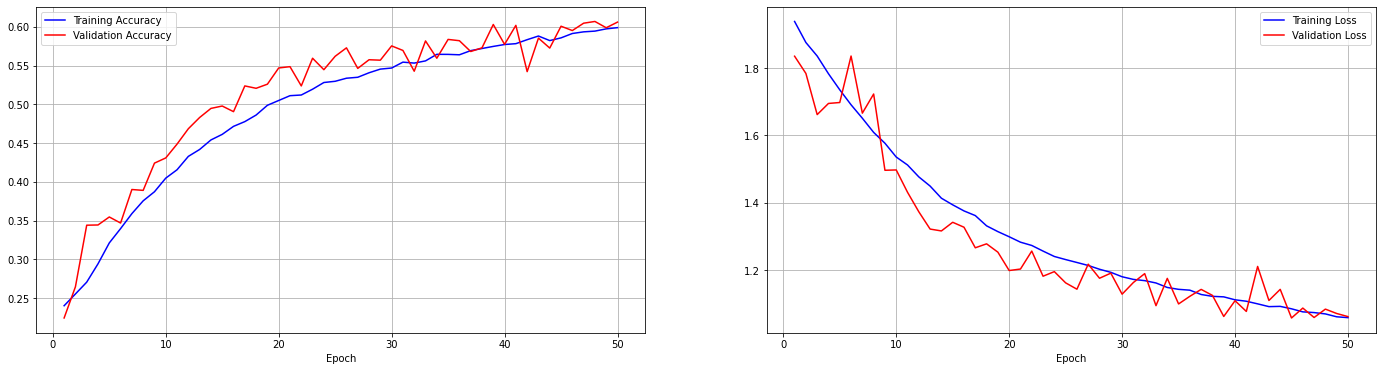

Best Validation Accuracy Score 0.60686, is for epoch 48


In [15]:
plot_results(history)
best_epoch =get_best_epcoh(history)

In [9]:
import numpy as np
import cv2
from tensorflow.keras.models import model_from_json

In [17]:
model_json_file = 'model.json'
model_weights_file = 'model_weights.h5'
with open(model_json_file, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(model_weights_file)

In [18]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [23]:
cap = cv2.VideoCapture(0)
import copy
import imutils

while True:
    
    ret, frame = cap.read()
    frame = imutils.resize(frame,width=1300)
    img = copy.deepcopy(frame)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        fc = gray[y:y+h, x:x+w]
        
        roi = cv2.resize(fc, (48,48))
        pred = loaded_model.predict(roi[np.newaxis, :, :, np.newaxis])
        text_idx=np.argmax(pred)
        text_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
        if text_idx == 0:
            text= text_list[0]
        if text_idx == 1:
            text= text_list[1]
        elif text_idx == 2:
            text= text_list[2]
        elif text_idx == 3:
            text= text_list[3]
        elif text_idx == 4:
            text= text_list[4]
        elif text_idx == 5:
            text= text_list[5]
        elif text_idx == 6:
            text= text_list[6]
        cv2.putText(img, text, (x, y-5),
           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 3)
        img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
            
    
    cv2.imshow("frame", img)
    
    key = cv2.waitKey(1) & 0xFF
    if key== ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()